In [36]:
library(arules)
library(ggplot2)
library(dplyr)
library(tidyr)
library(ggExtra)


In [2]:
data = read.csv("data_model_complete.csv")

In [7]:
df <- data %>%
    arrange(Week, -nHab)

In [14]:
df$Week <- factor(df$Week, levels = unique(df$Week))
df$Mun <- factor(df$Mun, levels = unique(df$Mun))

In [15]:
df$Mun

[1] BARCELONA                  TERRASSA                  
   [3] BADALONA                   SABADELL                  
   [5] LLEIDA                     TARRAGONA                 
   [7] MATARÓ                     SANTA COLOMA DE GRAMENET  
   [9] REUS                       GIRONA                    
  [11] SANT CUGAT DEL VALLÈS      RUBÍ                      
  [13] RUBÍ                       VILANOVA I LA GELTRÚ      
  [15] GRANOLLERS                 CERDANYOLA DEL VALLÈS     
  [17] SANT FELIU DE LLOBREGAT    IGUALADA                  
  [19] VILAFRANCA DEL PENEDÈS     RIPOLLET                  
  [21] LLORET DE MAR              EL VENDRELL               
  [23] MONTCADA I REIXAC          OLOT                      
  [25] TORTOSA                    BARBERÀ DEL VALLÈS        
  [27] SALT                       MARTORELL                 
  [29] SALOU                      SANT VICENÇ DELS HORTS    
  [31] SANT ANDREU DE LA BARCA    MOLINS DE REI             
  [33] OLESA DE MONTSERRAT        VILA-SECA                 
  [35] ESPARREGUERA               AMPOSTA                   
  [37] VILASSAR DE MAR            SANT QUIRZE DEL VALLÈS    
  [39] BANYOLES                   ROSES                     
  [41] BALAGUER                   BERGA                     
  [43] VALLIRANA                  CORBERA DE LLOBREGAT      
  [45] VILANOVA DEL CAMÍ          CASTELLBISBAL             
  [47] ABRERA                     ARGENTONA                 
  [49] LA SEU D'URGELL            MONTGAT                   
  [51] SANTA MARGARIDA DE MONTBUI CERVERA                   
  [53] SALLENT                    CONSTANTÍ                 
  [55] ARTÉS                      SARRIÀ DE TER             
  [57] BARCELONA                  TERRASSA                  
  [59] BADALONA                   SABADELL                  
  [61] LLEIDA                     TARRAGONA                 
  [63] MATARÓ                     SANTA COLOMA DE GRAMENET  
  [65] REUS                       GIRONA                    
  [67] SANT CUGAT DEL VALLÈS      RUBÍ                      
  [69] RUBÍ                       VILANOVA I LA GELTRÚ      
  [71] GRANOLLERS                 CERDANYOLA DEL VALLÈS     
  [73] VIC                        FIGUERES                  
  [75] SANT FELIU DE LLOBREGAT    IGUALADA                  
  [77] VILAFRANCA DEL PENEDÈS     BLANES                    
  [79] RIPOLLET                   EL VENDRELL               
  [81] MONTCADA I REIXAC          OLOT                      
  [83] TORTOSA                    BARBERÀ DEL VALLÈS        
  [85] SALT                       MARTORELL                 
  [87] SALOU                      SANT VICENÇ DELS HORTS    
  [89] SANT ANDREU DE LA BARCA    MOLINS DE REI             
  [91] OLESA DE MONTSERRAT        PALAFRUGELL               
  [93] VILA-SECA                  ESPARREGUERA              
  [95] AMPOSTA                    VILASSAR DE MAR           
  [97] MANLLEU                    SANT QUIRZE DEL VALLÈS    
  [99] BANYOLES                   PARETS DEL VALLÈS         
 [101] PALAMÓS                    BALAGUER                  
 [103] TÀRREGA                    BERGA                     
 [105] VALLIRANA                  CORBERA DE LLOBREGAT      
 [107] VILANOVA DEL CAMÍ          CASTELLBISBAL             
 [109] ABRERA                     ARGENTONA                 
 [111] LA SEU D'URGELL            MONTGAT                   
 [113] SANTA MARGARIDA DE MONTBUI VILASSAR DE DALT          
 [115] MONTBLANC                  SALLENT                   
 [117] CONSTANTÍ                  TREMP                     
 [119] ARTÉS                      VILAFANT                  
 [121] SARRIÀ DE TER              SANTA EUGÈNIA DE BERGA    
 [123] BARCELONA                  TERRASSA                  
 [125] BADALONA                   SABADELL                  
 [127] LLEIDA                     TARRAGONA                 
 [129] MATARÓ                     SANTA COLOMA DE GRAMENET  
 [131] REUS                       GIRO

In [48]:
df$nHab_disc = discretize(
    df$nHab,
    method = "frequency",
    breaks = 5,
    labels = seq(1,5)
)

In [50]:
unique(df$nHab_disc)

[1] 5 4 3 2 1
Levels: 1 2 3 4 5

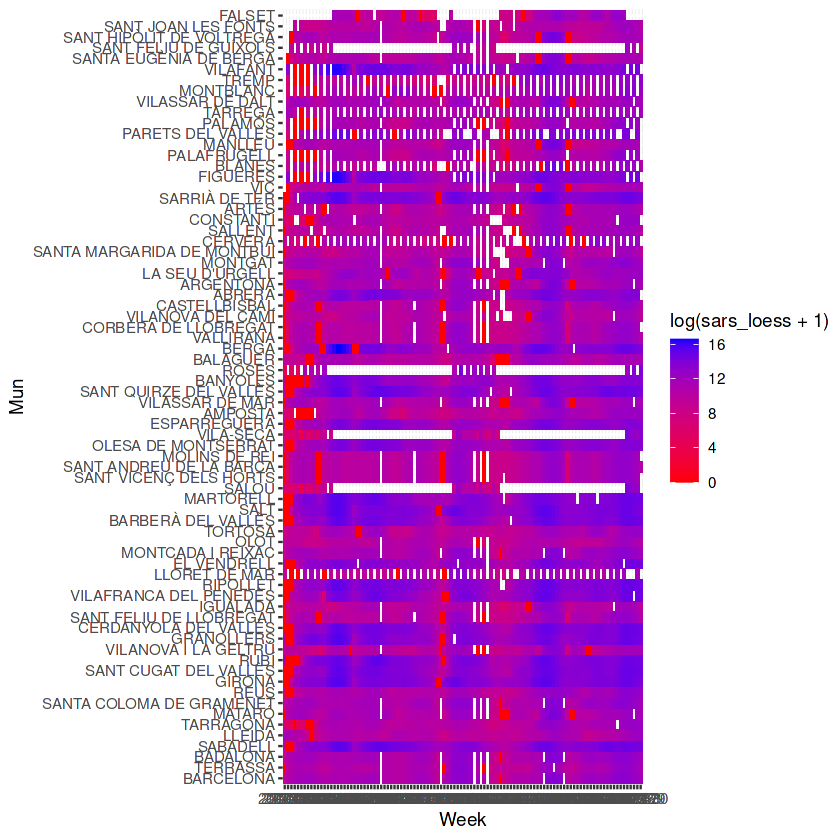

In [33]:
ggplot(df, aes(x = Week, y = Mun, fill = log(sars_loess+1))) +
    geom_tile() +
    scale_fill_gradient(low = "red", high = "blue")